# Introduction

In this competition the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

There is a resource which includes algorithms that have been tried on it and their levels of success: http://yann.lecun.com/exdb/mnist/index.html.

> ❗️ About the competition:
* This competition is evaluated on the categorization accuracy.
* The submitted file should contain a header and have the following format:\
ImageId,Label\
1,0\
2,0\
3,0\
etc.





# Data
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* This pixel-value is an integer between 0 and 255
* Train set has 785 columns.

## Inspect the data

In [ ]:
# See data files
from pathlib import Path
!ls drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer

sample_submission.csv  test.csv  train.csv


In [ ]:
# Import and read train and test datasets
import pandas as pd
train_df = pd.read_csv('drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer/train.csv')
test_df = pd.read_csv('drive/MyDrive/data/deep_learning/computer_vision/digit-recognizer/test.csv')

In [ ]:
# Check shapes, sizes and dtypes
print(f'Train data\nSize: {train_df.size}\nShape: {train_df.shape}\nType: {type(train_df)}\n')
print(f'Test data\nSize: {test_df.size}\nShape: {test_df.shape}\nType: {type(test_df)}')

Train data
Size: 32970000
Shape: (42000, 785)
Type: <class 'pandas.core.frame.DataFrame'>

Test data
Size: 21952000
Shape: (28000, 784)
Type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's plot some random data through one function
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_random_number(data, shape = (28, 28)):
  img_matrix = np.array(data.drop(labels = 'label', axis = 1))
  label = np.array(data['label'])

  # Prepare data
  images = img_matrix.reshape(42000, 28, 28)
  random_index = random.choice(np.arange(len(img_matrix)))
  random_img = images[random_index]
  random_label = label[random_index]

  # Plot data
  plt.imshow(random_img)
  plt.title(f'Label: {random_label}')
  plt.axis(False)


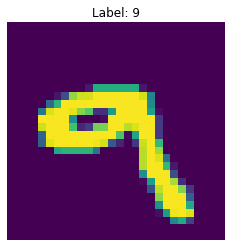

In [ ]:
plot_random_number(train_df)

## Data preprocessing

In [ ]:
# Split train data into train and validation data sets
from sklearn.model_selection import train_test_split

X_df = train_df.drop(labels = 'label', axis = 1)
y_df = train_df['label']

X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_df, y_df, test_size = 0.2)

X_train_df.shape, X_val_df.shape, y_train_df.shape, y_val_df.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [ ]:
# Convert our dataframes into tensors and one hot encode our labels (multiclass problem)
import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train_df)
X_val_tensor = tf.convert_to_tensor(X_val_df)
y_train_tensor = tf.convert_to_tensor(tf.one_hot(y_train_df, depth = 10))
y_val_tensor = tf.convert_to_tensor(tf.one_hot(y_val_df, depth = 10))

X_test_tensor = tf.convert_to_tensor(test_df)

X_train_tensor, y_train_tensor

(<tf.Tensor: shape=(33600, 784), dtype=int64, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])>,
 <tf.Tensor: shape=(33600, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>)

In [ ]:
# Check min and max values into our tensors
tf.reduce_min(X_train_tensor), tf.reduce_max(X_train_tensor)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=255>)

In [ ]:
tf.reduce_min(y_train_tensor), tf.reduce_max(y_train_tensor)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [ ]:
# So we have to normalize our data!
from tensorflow.keras.utils import normalize
X_train_tensor = normalize(X_train_tensor)
X_val_tensor = normalize(X_val_tensor)
X_test_tensor = normalize(X_test_tensor)

tf.reduce_max(X_train_tensor), tf.reduce_max(y_train_tensor)


(<tf.Tensor: shape=(), dtype=float64, numpy=0.27392289463802594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [ ]:
# Reshape our tensors
X_train = tf.reshape(X_train_tensor, [-1, 28, 28, 1])
X_val = tf.reshape(X_val_tensor, [-1, 28, 28, 1])
X_test = tf.reshape(X_test_tensor, [-1, 28, 28, 1])
y_train = tf.squeeze(y_train_tensor)
y_val = tf.squeeze(y_val_tensor)
X_train.shape, y_train.shape

(TensorShape([33600, 28, 28, 1]), TensorShape([33600, 10]))

# Create the model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, RandomFlip, RandomRotation
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(100,(3,3), activation='relu', input_shape = (28,28,1))),
model.add(MaxPooling2D(5, 5)),
model.add(Conv2D(100,(5,5), activation='relu')),
model.add(MaxPooling2D(5, 5)),
model.add(Dropout(0.2)),
model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 8
history = model.fit(x=X_train, y = y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(X_val, y_val),
              shuffle=True)


Epoch 1/8
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2079 - accuracy: 0.9345 - val_loss: 0.0782 - val_accuracy: 0.9736
Epoch 2/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0604 - val_accuracy: 0.9813
Epoch 3/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 4/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0569 - val_accuracy: 0.9846
Epoch 5/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0522 - val_accuracy: 0.9864
Epoch 6/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0454 - val_accuracy: 0.9886
Epoch 7/8
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.0416 - val_accuracy: 0.9890

In [ ]:
model.evaluate(X_val, y_val)

263/263 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9881


[0.040090665221214294, 0.988095223903656]

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([[3.87735872e-06, 1.69525015e-06, 9.99949813e-01, ...,
        5.03998535e-06, 1.30268299e-05, 4.71153669e-07],
       [9.99965310e-01, 1.03229985e-08, 1.21225742e-06, ...,
        1.15728426e-07, 1.57679850e-07, 2.90890603e-06],
       [1.17479096e-10, 1.06541186e-10, 3.12637227e-09, ...,
        9.96040850e-09, 2.50372341e-05, 9.99973893e-01],
       ...,
       [2.59632827e-14, 2.38920550e-10, 2.26353363e-11, ...,
        2.90304691e-09, 2.70569096e-08, 5.90964522e-09],
       [8.66258745e-07, 8.29599927e-08, 1.40819975e-06, ...,
        6.81136298e-05, 8.36919867e-07, 9.99713361e-01],
       [5.14746779e-09, 2.85720603e-08, 9.99986410e-01, ...,
        5.06671638e-09, 1.30472981e-05, 1.53813340e-09]], dtype=float32)

In [ ]:
predictions = np.argmax(y_preds, axis = 1)
predictions
len(predictions)

28000

In [ ]:
prediction_df = pd.DataFrame({'ImageId': range(1, 28001),
                              'Label': predictions},)
prediction_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
prediction_df.to_csv('digit_predictions.csv', index = False)